# Model Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
property_assess = pd.read_csv('assessment_per_capita.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
property_assess.columns

Index(['Unnamed: 0', 'acc_num', 'nb', 'nb_id', 'class', 'value', 'suite',
       'number', 'street', 'garage', 'lat', 'long', 'zoning', 'lot_size',
       'year_built', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'population', 'num_incidents', 'crime_per_capita'],
      dtype='object')

In [4]:
ml = property_assess[['value', 'nb_id', 'garage', 'zoning', 'lot_size', 'year_built', 'population', 'crime_per_capita']]

In [5]:
ml.garage = ml.garage.astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
zones = ml.zoning.unique()
zones

array(['RF1', 'RF4', 'RSL', 'RF5', 'RA7', 'RPL', 'RF6', 'RMD', 'RF3',
       'RA8', 'RR', 'RA9', 'UCRH', 'RF2', 'RA8h', 'RMH', 'RA7a', 'TSLR',
       'RF4t', 'RPLt', 'RF5t', 'RA7*', 'TSDR', 'RA9*', 'RF6*', 'HDR',
       'RMU', 'CR', 'RF5g', 'RA7g', 'EETR'], dtype=object)

In [7]:
zones_map = {'RF1':1, 'RF4':2, 'RSL':3, 'RF5':4, 'RA7':5, 'RPL':6, 'RF6':7, 'RMD':8, 'RF3':9,\
       'RA8':10, 'RR':11, 'RA9':12, 'UCRH':13, 'RF2':14, 'RA8h':15, 'RMH':16, 'RA7a':17, 'TSLR':18,\
       'RF4t':19, 'RPLt':20, 'RF5t':21, 'RA7*':22, 'TSDR':23, 'RA9*':24, 'RF6*':25, 'HDR':26,\
       'RMU':27, 'CR':28, 'RF5g':29, 'RA7g':30, 'EETR':31}

In [8]:
ml.zoning = ml.zoning.map(zones_map)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
ml.head()

,value,nb_id,garage,zoning,lot_size,year_built,population,crime_per_capita
0,312500,6350.0,1,1,557.0,1964.0,2553.0,0.012926
1,388500,6350.0,1,1,566.0,1962.0,2553.0,0.012926
2,554500,6350.0,1,2,886.0,1968.0,2553.0,0.012926
3,421500,6350.0,1,1,580.0,1962.0,2553.0,0.012926
4,413000,6350.0,1,1,554.0,1965.0,2553.0,0.012926


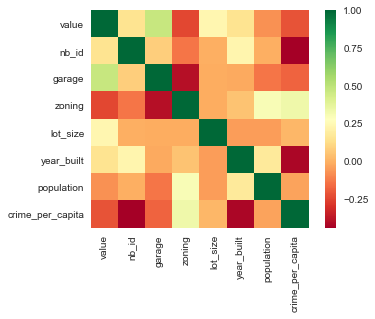

In [10]:
_ = sns.heatmap(ml.corr(), square=True, cmap='RdYlGn')
plt.show()

In [11]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297554 entries, 0 to 297553
Data columns (total 8 columns):
value               297554 non-null int64
nb_id               297554 non-null float64
garage              297554 non-null int64
zoning              297554 non-null int64
lot_size            218469 non-null float64
year_built          289720 non-null float64
population          296187 non-null float64
crime_per_capita    296187 non-null float64
dtypes: float64(5), int64(3)
memory usage: 18.2 MB


In [12]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer

In [13]:
# Set target and feature variables
X = ml.drop('value', axis=1).values
y = ml['value'].values

In [14]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(X)
X = imp.transform(X)

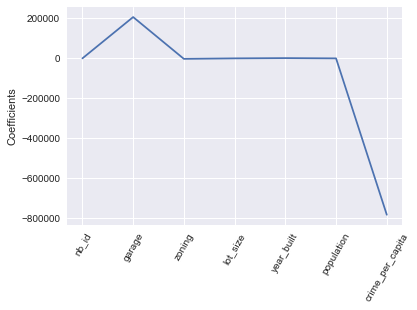

In [15]:
y = y.reshape(-1, 1)

names = ml.drop('value', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [16]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

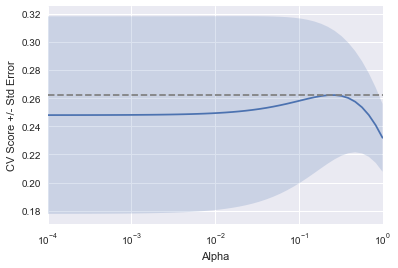

In [17]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [18]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 1653.3770315121349
Standard Deviation of Unscaled Features: 2393.9599107481818
Mean of Scaled Features: -3.737748753012066e-16
Standard Deviation of Scaled Features: 0.9999999999999994


In [19]:
# Import the necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy with Scaling: 0.04589601980575129
Accuracy without Scaling: 0.044047632383747634


In [20]:
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.9655172413793103}
Tuned ElasticNet R squared: 0.19262692801444103
